<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Machine_Learning/blob/main/ADP/Chapter_6_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 5. 서포트 벡터 머신(SVM)

## 1.개념

SVM은 새로운 데이터가 입력되었을 때 기존 데이터를 활용해 분류하는 방법이다. 패턴인식, 자료분석 등을 위한 지도학습 모델로 회귀와 분류 문제 해결에 사용되는 알고리즘이다

SVM은 최대 마진 분류기를 일반화한 것이며, 이 분류기의 단점을 극복하고 확장성 넓힌 것이 SVC, 이를 또 확장하고 비선형 클래스 경계를 수용하는 SVM이 고안됨

### (1) 최대 마진 분류기 (Maximal Margine Classifier)

초평면(Hyperplane)은 p차원 공간에서 차원이 p-1인 평평한 아핀(affine) 부분공간이다. 예를 들어 2차원에서는 1차원 부분공간인 선이 초평면이고, 3차원 공간에서는 2차원 부분공간인 평면이 초평면이 된다.

데이터를 두 공간으로 나눌 수 있는 초평면은 무한 개가 있다. 데이터를 두 공간으로 나누는 분리 초평면을 기반으로 무한 개의 초평면 중 어느 것을 최종적으로 사용할지 결정해야 한다. 이때 margine의 개념을 활용한다. **즉, 관측치들에서 초평면까지 가장 짧은 거리인 마진이 가장 큰 분리 초평면을 찾는다.** 그리고 양의 초평면과 음의 초평면에 접한 관측값들을 '서포트 벡터'라고 한다. 다시 말해, **서포트 벡터는 초평면 가장 가까이에 붙어있는 최전방 데이터이다.**

But, 모든 데이터가 초평면에 의해 두 영역으로 분류될 수 있는 것이 아니기에, 최대 마진 분류기는 모든 데이터에 적용하기 어렵다. 또한 분리 초평면에 의해 데이터 클래스를 나누면 학습 데이터를 완벽하게 분류하기 때문에 과적합 문제와 테스트 데이터의 이상치에 민감할 수 있다.

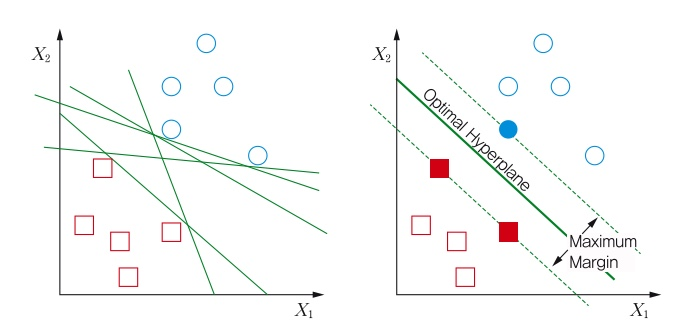

### (2) 서포트 벡터 분류기 (SVC; Support Vector Classifier)

SVC는 최대 마진 분류기를 가지면서도 일부 관측치들이 마진이나 초평면의 반대쪽에 있는 것을 허용한다.


오차를 튜닝하는 하이퍼파라미터인 C의 크기에 따라 오차 허용도가 달라진다. C = 0이면 마진을 위반할 여유가 없으므로 최대 마진 초평면과 같다.

C > 0이면 C 이하의 관측치들이 초평면의 반대쪽에 존재하는 것을 허용한다. 그러므로 C가 증가하며 모델을 더 유연하게 만들어 마진 위반에 대한 허용도가 커진다.

But, SVC는 데이터 클래스가 두 영역으로 나뉘고 그 사이의 경계가 선형인 경우만 가능하다.

### (3) 서포트 벡터 머신(SVM; Support Vector Machine)



클래스의 경계가 비선형인 경우 SVC의 개념을 확장하고 커널을 활용해 SVM(support vector machine)을 사용한다. Kernel이란 두 관측치들의 유사성을 수량화하는 함수를 말한다.

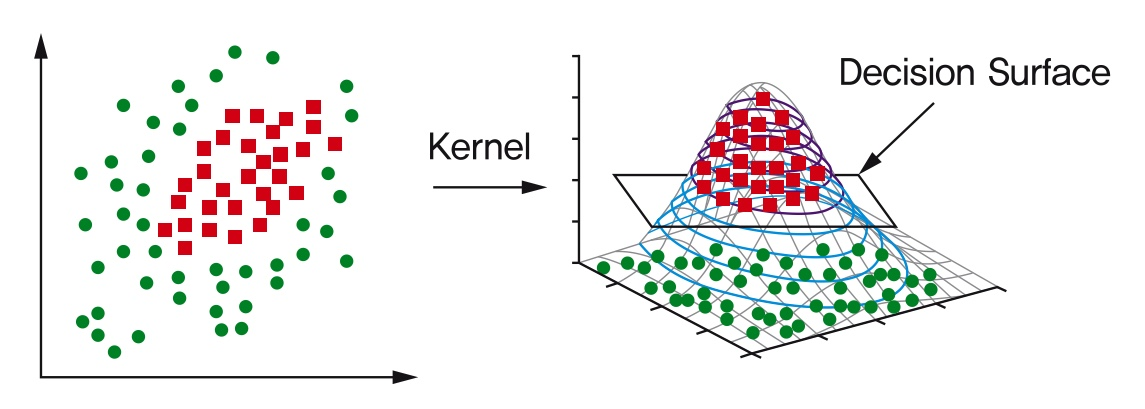

(4) 서포트 벡터 회귀 (SVR; Support Vector Regression)

SVM은 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 최대가 되도록 했지만, SVR은 제한된 마진 오류 안에서 도로 안에 가능한 한 많은 데이터 샘플이 들어가도록 학습한다. 이때, 마진 오류는 도로 밖의 데이터 샘플을 의미한다.

SVR에서 사용하는 손실 함수 중 가장 대표적인 것은 epsilon-insensitive 함수이다.

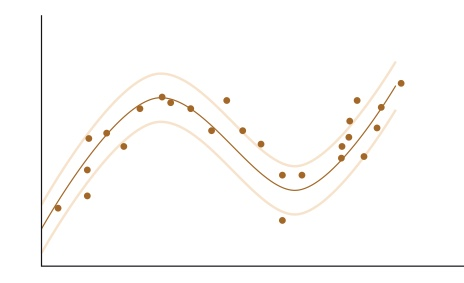

## 2.scikit-learn의 LinearSCV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv")
c.head(3)

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0


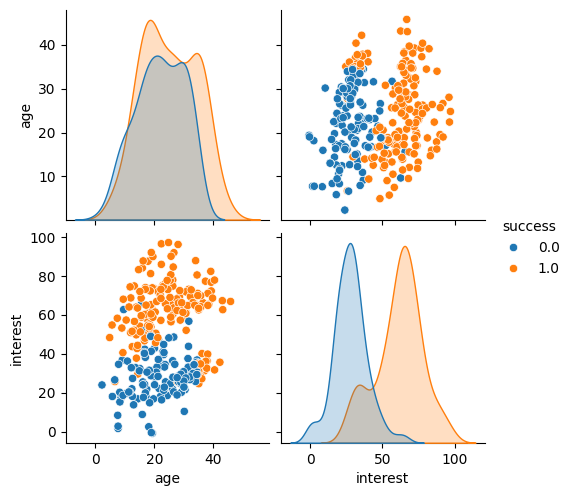

In [2]:
# class 분포 확인
sns.pairplot(hue = 'success', data = c)

In [3]:
from sklearn.model_selection import train_test_split
x = c[['age', 'interest']]
y = c['success']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


SVM은 특성의 스케일에 민감하기 때문에 스케일러를 사용하면 좀더 예측력이 높은 결정경계 생성이 가능하다.

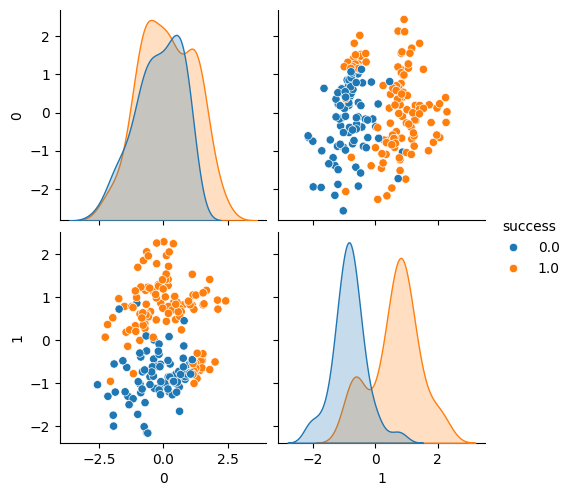

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

sns.pairplot(data = pd.concat([pd.DataFrame(train_x),
                               train_y.reset_index(drop = True)],
                              axis = 1),
             hue = 'success')
# 클래스의 특성이 조금 더 잘 시각화 되는 것을 확인할 수 있다

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

svc = SVC(C = 0.5, random_state = 56)
svc.fit(train_x, train_y) # 피팅

test_x_sc = scaler.transform(test_x) # test 데이터도 스케일링

pred = svc.predict(test_x_sc) # 예측

cm = confusion_matrix(test_y, pred)
acc = accuracy_score(test_y, pred)
prc = precision_score(test_y, pred)
rcll = recall_score(test_y, pred)
f1 = f1_score(test_y, pred)

print(cm)
print()
print(f'정확도: {acc*100:.3f}%')
print(f'정밀도: {prc*100:.3f}%')
print(f'재현율: {rcll*100:.3f}%')
print(f'F1: {f1*100:.3f}%')

[[37  2]
 [ 2 49]]

정확도: 95.556%
정밀도: 96.078%
재현율: 96.078%
F1: 96.078%


## 3.scikit-learn의 SVR

In [9]:
# numpy로 임의 데이터 생성 후 타깃데이터인 y에 노이즈 추가
X = np.sort(5 * np.random.rand(40, 1), axis = 0)
y = np.sin(X).ravel()

print(X[0:5], '\n\n', y[0:5])

[[0.02475306]
 [0.08023768]
 [0.17517849]
 [0.19314286]
 [0.50461302]] 

 [0.02475053 0.08015161 0.1742839  0.19194426 0.48346873]


In [10]:
# y에 노이즈 추가
y[::5] += 3 * (0.5 - np.random.rand(8))
print(y[0:5])

[-1.31034978  0.08015161  0.1742839   0.19194426  0.48346873]


커널함수를 각각 랜덤포레스트(rbf), 선형회귀(linear), 다항회귀(ploy)로 설정하여 비교

In [11]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = 0.1)
svr_lin = SVR(kernel = 'linear', C = 100, gamma = 'auto')
svr_poly = SVR(kernel = 'poly', C = 100, gamma = 'auto', degree = 3, epsilon = 0.1, coef0 = 1)

# 피팅
svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

# 예측
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index = kernel, columns = evls)

for pred, k in zip(preds, kernel) :
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)

    results.loc[k]['mse'] = round(mse, 3)
    results.loc[k]['rmse'] = round(rmse, 3)
    results.loc[k]['mae'] = round(mae, 3)

results

,mse,rmse,mae
Random Forest,0.122,0.35,0.189
Linear,0.425,0.652,0.454
Polynomial,0.121,0.347,0.185


다항 회귀 커널이 가장 잘 적합하는 것을 알 수 있다.

# Section 6. K-최근접 이웃(KNN)

## 1.개념

KNN은 유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다는 가정으로 데이터를 분류하는 ML기법이다.
원리는, 학습 데이터를 그대로 저장한 뒤 새로운 데이터 포인트에 대해 학습데이터에서 가장 가까운 k개의 포인트를 찾아 그것들로부터 새로운 데이터 포인트의 범주를 라벨링 하는 것이다.
손글씨 및 위성 이미지 분석 등에 높은 예측력을 가지며, 비모수적 방식이기 때문에 결정경계가 매우 불규칙한 분류에서 높은 예측성능을 보인다.

### (1) KNN 분류

KNN 분류 모델은 샘플데이터로부터 가장 가까운 학습데이터 포인트 하나를 최근접 이웃으로 선택해 예측에 사용한다. 2차원 그래프사에서 새로운 데이터가 '거리상 가장 가까운' 데이터와 유사한 집단에 속할 것이라고 생각할 수 있다.

이 거리를 측정하기 위해 유클리디안 거리가 가장 많이 사용된다. d = sqrt{(x1-x2)^2 + (y1-y2)^2}

몇 개의 데이터를 고려할 것인지 결정하는 k를 잘 설정해야 한다.

### (2) KNN 회귀

KNN 회귀는 가까운 이웃 데이터들을 고려하지만 개별값을 예측한다는 차이가 있다. 즉, KNN 회귀는 k개 이웃 데이터를 사용해 회귀선을 도출한다. 하나의 회귀식을 도출하는 것이 아니라는 점에서 선형회귀와 다르다. KNN은 주어진 입력을 바탕으로 가장 잘 예측된 평균값들의 집합을 나타낸다. 그렇기 때문에 종속변수에 대한 독립변수의 영향력을 의미하는 회귀계수는 KNN에서 알 수 없다.

## 2.scikit-learn의 KNeighborsClassifier

dataset 변수를 통해 간질환자는 두 집단으로 나뉘어져있다는 것을 알 수 있다. dataset변수를 타깃으로 하여 knn 수행

In [2]:
import pandas as pd

liver = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/indian_liver_patient.csv")
print(liver.Dataset.unique())

[1 2]


In [3]:
liver.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [5]:
import numpy as np
liver.Gender = np.where(liver.Gender == 'Female', 0, 1)

liver.isna().sum() # 결측치 확인 -> 4개 밖에 없어서 삭제
liver.dropna(axis = 0, inplace = True)

In [6]:
from sklearn.model_selection import train_test_split
x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(405, 10) (174, 10) (405,) (174,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform')
knn.fit(train_x, train_y)

pred = knn.predict(test_x)

cm = confusion_matrix(test_y, pred)
acc = accuracy_score(test_y, pred)
prc = precision_score(test_y, pred)
rcll = recall_score(test_y, pred)
f1 = f1_score(test_y, pred)

print(cm)
print()
print(f'정확도: {acc*100:.3f}%')
print(f'정밀도: {prc*100:.3f}%')
print(f'재현율: {rcll*100:.3f}%')
print(f'F1: {f1*100:.3f}%')

[[106  18]
 [ 38  12]]

정확도: 67.816%
정밀도: 73.611%
재현율: 85.484%
F1: 79.104%


## 3.scikit-learn의 KNeighborsRegressor

In [1]:
import numpy as np

# 임의의 샘플 데이터 생성
np.random.seed(56)
X = np.sort(5 * np.random.rand(400, 1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

In [4]:
# 데이터 확인
print(X[:10].T)
print(T[:10].T)
print(y[:10])

[[0.00821218 0.04731889 0.08157758 0.08706813 0.0952714  0.09865614
  0.10278203 0.10597351 0.11855978 0.12710486]]
[[0.         0.01002004 0.02004008 0.03006012 0.04008016 0.0501002
  0.06012024 0.07014028 0.08016032 0.09018036]]
[0.00821209 0.04730123 0.08148713 0.08695817 0.09512734 0.09849619
 0.10260116 0.10577527 0.11828222 0.12676289]


In [5]:
# 타깃 데이터에 노이즈 추가
y[::1] += 1 * (0.5 - np.random.rand(400))

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 56)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [14]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_uni = KNeighborsRegressor(n_neighbors = 20, weights = 'uniform')
knn_dis = KNeighborsRegressor(n_neighbors = 20, weights = 'distance')

knn_uni.fit(train_x, train_y)
knn_dis.fit(train_x, train_y)

# 두 모델 성능 비교
uni_pred = knn_uni.predict(test_x)
dis_pred = knn_dis.predict(test_x)

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index = weights, columns = evls)

for pred, k in zip(preds, weights) :
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)

    results.loc[k]['mse'] = round(mse, 3)
    results.loc[k]['rmse'] = round(rmse, 3)
    results.loc[k]['mae'] = round(mae, 3)

results

,mse,rmse,mae
uniform,0.077,0.278,0.233
distance,0.098,0.313,0.257


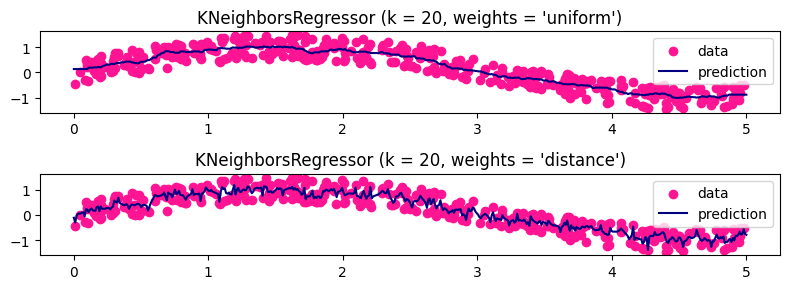

In [18]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (8,3))

for i, weights in enumerate(['uniform', 'distance']) :
    knn = KNeighborsRegressor(n_neighbors = 20, weights = weights)

    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i+1)
    plt.scatter(X, y, color = 'deeppink', label = 'data')
    plt.plot(T, y_, color = 'navy', label = 'prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" %(20, weights))

plt.tight_layout()
plt.show()
# 두 모델 사이에 차이가 있음을 알 수 있다.

# Section 7. 의사결정나무 (Decision Tree)

## 1.개념

결정트리는 데이터를 분류/예측하는 결정에 이르기 위해 특정 기준에 따라 '예/아니오'로 답할 수 있는 질문을 이어나가며 학습한다. 그러므로 결정트리를 통해 얻은 결과는 분류규칙이 명확하여 해석이 쉽다. 또한 선형성과 정규성 등의 가정이 필요하지 않아 전처리 과정에 모델의 성능이 큰 영향을 받지 않는다.

### (1) 결정트리 생성하기

결정트리는 데이터를 통해 각 마디에서 적절한 최적의 분리규칙(Splitting Rule)을 찾아 결정트리의 질문목록을 생성한다. 트리를 성장시키는 과정에서 적절한 정지규칙(Stopping Rule)을 만족하면 트리의 자식마디(노드) 생성을 중단한다. 분리규칙을 설정하는 분리기준(Splitting Criterion)은 목표변수가 이산형인지 연속형인지에 따라 다르다.

1. 이산형 목표변수 = 분류분석
- 분리기준:
  - 카이제곱 통계량 p값: p값이 가장 작은 예측변수와 그 때의 최적분리에 의해서 자식마디를 형성
  - 지니지수: 지니지수를 감소시키는 예측변수와 그 때의 최적분리에 의해서 자식마디를 형성
  - 엔트로피지수: 엔트로피지수가 가장 작은 예측변수와 이때의 최적분리에 의해 자식마디를 형성

2. 연속형 목표변수 = 회귀분석
- 분리기준:
  - 분산분석 F-통계량: p값이 가장 작은 예측변수와 그 때의 최적분리에 의해서 자식마디를 형성
  - 분산의 감소량: 분산의 감소량을 최대화하는 기준의 최적분리에 의해서 자식마디를 형성

### (2) 결정트리 복잡도 제어하기

트리의 크기를 의사결정나무 모델의 복잡도라고 한다. 학습데이터를 분할하는 질문목록을 생성할 때 모든 데이터가 각각 분할되도록 가지를 친다면 이 모델은 해당 학습데이터에 대해 높은 예측력을 가지는 반면, 과적합 문제가 발생한다. 이러한 과적합 문제를 방지하기 위해 가지치기(Pruning)를 이용해서 트리의 성장을 제한한다. 즉, 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수를 지정한다.

### (3) 트리의 특성 중요도 (Feature Importance)

결정트리는 트리가 어떻게 작동했는지 속성을 살펴볼 수 있다. 변수중요도(Feature Importance)는 트리를 만드는 결정에 각각의 변수가 얼마나 중요했는지를 평가한다. 변수 중요도는 0~1 사이 숫자이다.

### (4) 의사결정나무의 장단점

1. 장점
- 모델을 쉽게 설명할 수 있고 시각화하기 편하다
- 데이터의 스케일에 영향받지 않아 정규화, 표준화 등의 전처리를 요구하지 않는다
2. 단점
- 가지치기 방식에도 불구하고 과대적합의 가능성이 높아 일반화 성능이 우수하지 않다

=> 이러한 단일 결정트리의 단점을 극복하기 위해 앙상블을 사용한다.

## 2.scikit-learn의 tree.DecisionTreeClassifier

UCI Machine Learning 저장소의 독일 신용 데이터 사용

In [2]:
import pandas as pd

credit = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/credit_final.csv")
credit.head(3)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1


In [3]:
feature_col = list(credit.columns.difference(['credit.rating']))
X = credit[feature_col]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 56)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(700, 20) (300, 20) (700,) (300,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(train_x, train_y)

pred = tree.predict(test_x)

cm = confusion_matrix(test_y, pred)
acc = accuracy_score(test_y, pred)
prc = precision_score(test_y, pred)
rcll = recall_score(test_y, pred)
f1 = f1_score(test_y, pred)

print(cm)
print()
print(f'정확도: {acc*100:.3f}%')
print(f'정밀도: {prc*100:.3f}%')
print(f'재현율: {rcll*100:.3f}%')
print(f'F1: {f1*100:.3f}%')

[[ 23  67]
 [ 24 186]]

정확도: 69.667%
정밀도: 73.518%
재현율: 88.571%
F1: 80.346%


In [7]:
from sklearn.metrics import classification_report
report = classification_report(test_y, pred)
print(report) # 분석결과 동일

              precision    recall  f1-score   support

           0       0.49      0.26      0.34        90
           1       0.74      0.89      0.80       210

    accuracy                           0.70       300
   macro avg       0.61      0.57      0.57       300
weighted avg       0.66      0.70      0.66       300



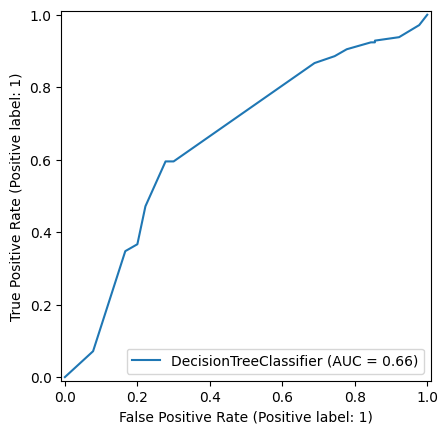

AUC 0.6566402116402117


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(tree, test_x, test_y)
plt.show()
auc = roc_auc_score(test_y, tree.predict_proba(test_x)[:, 1])
print('AUC', auc)

In [22]:
# 변수 중요도 확인
importance = tree.feature_importances_
colname = pd.DataFrame(X.columns)
feature_imp = pd.concat([colname, pd.DataFrame(importance)], axis = 1)
feature_imp.columns = ['Column name', 'Importances']
print(feature_imp)

                       Column name  Importances
0                  account.balance     0.326353
1                              age     0.016250
2                   apartment.type     0.008737
3                     bank.credits     0.000000
4                    credit.amount     0.118354
5           credit.duration.months     0.154914
6                   credit.purpose     0.047742
7                   current.assets     0.014131
8                       dependents     0.000000
9              employment.duration     0.016329
10                  foreign.worker     0.000000
11                       guarantor     0.039195
12                installment.rate     0.021657
13                  marital.status     0.019872
14                      occupation     0.017117
15                   other.credits     0.033600
16  previous.credit.payment.status     0.054444
17              residence.duration     0.008634
18                         savings     0.102670
19                       telephone     0

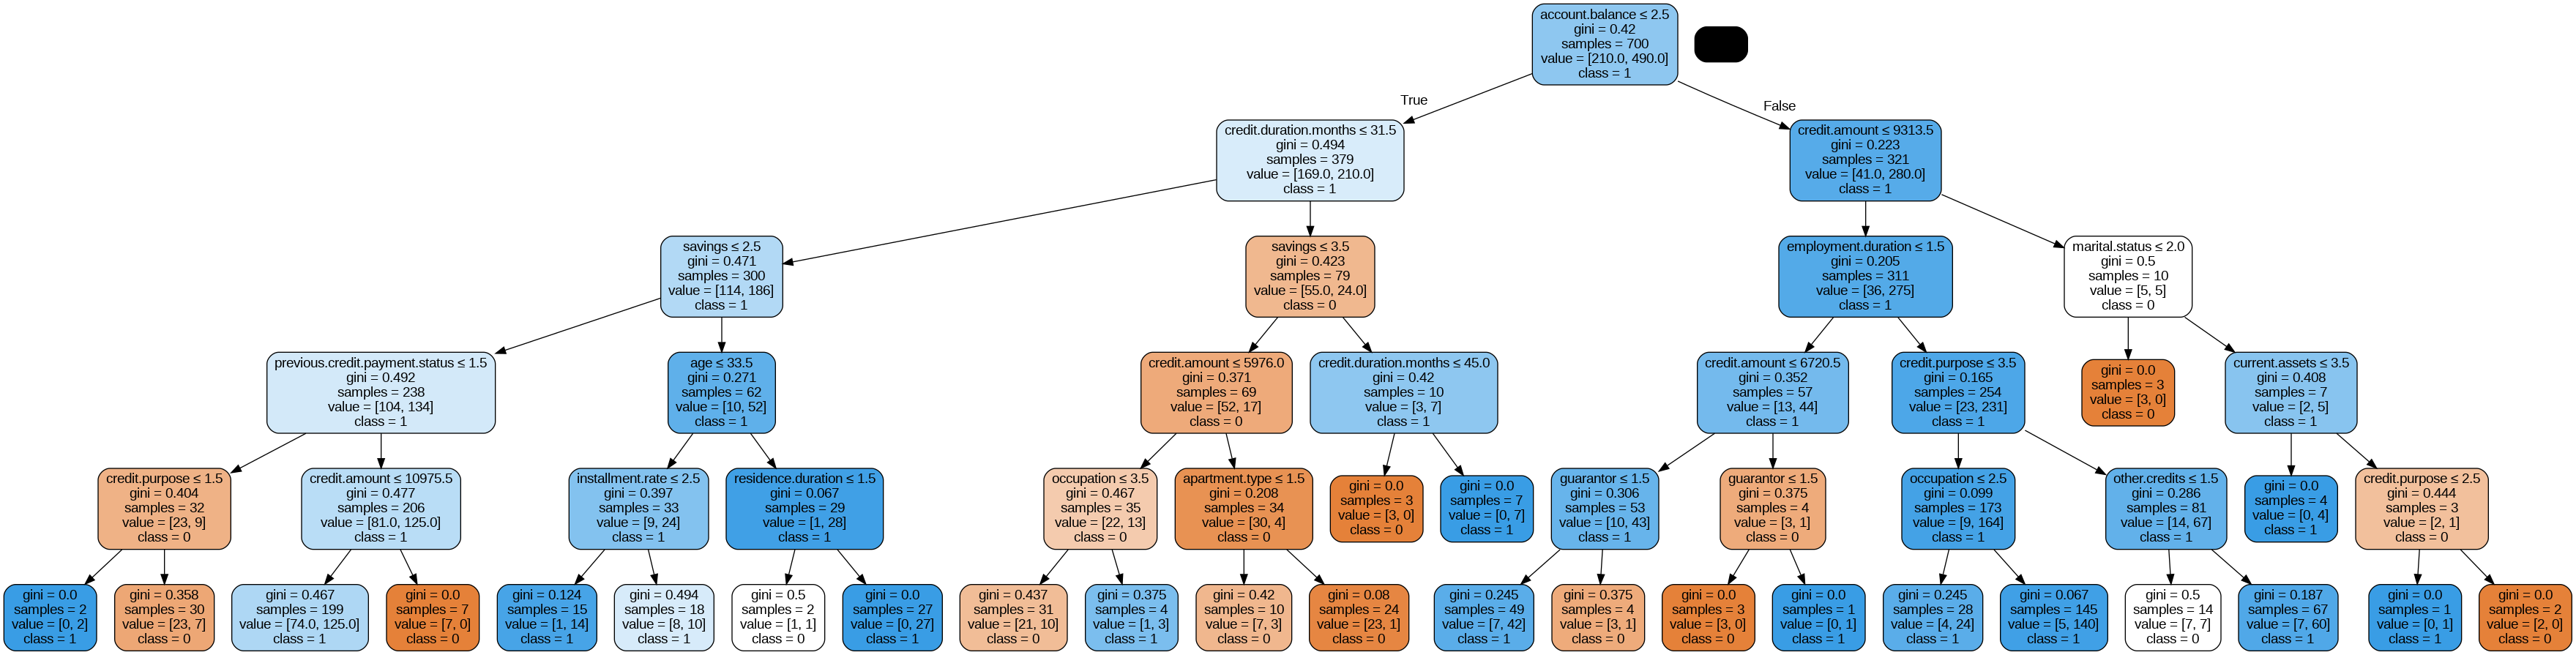

In [25]:
# 시각화
import numpy as np
import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

target_name = np.array(['0', '1'])

tree_dot = export_graphviz(tree, feature_names = feature_col, class_names = target_name,
                           filled = True, rounded = True, special_characters = True)
tree_graph = pydotplus.graph_from_dot_data(tree_dot)
Image(tree_graph.create_png())

## 3.scikit-learn의 tree.DecisionTreeRegressor

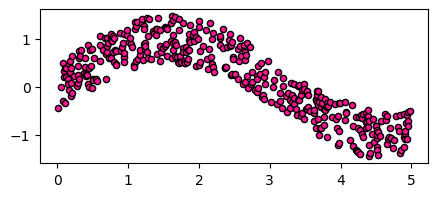

In [27]:
# 임의의 샘플 데이터 생성
np.random.seed(56)
X = np.sort(5 * np.random.rand(400, 1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::1] += 1 * (0.5 - np.random.rand(400))
plt.figure(figsize = (5, 2))
plt.scatter(X, y, s = 20, edgecolor = 'black', c = 'deeppink', label = 'data')

In [30]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 56)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
tree1 = DecisionTreeRegressor(max_depth = 2)
tree2 = DecisionTreeRegressor(max_depth = 5)

# 두 모델 성능 비교
pred1 = tree1.fit(train_x, train_y).predict(test_x) # pred
pred2 = tree2.fit(train_x, train_y).predict(test_x) # pred

preds = [pred1, pred2]
weights = ['max depth=2', 'max depth=5']
evls = ['mse', 'rmse', 'mae']
results = pd.DataFrame(index = weights, columns = evls)

for pred, k in zip(preds, weights) :
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)

    results.loc[k]['mse'] = round(mse, 3)
    results.loc[k]['rmse'] = round(rmse, 3)
    results.loc[k]['mae'] = round(mae, 3)

results

,mse,rmse,mae
max depth=2,0.109,0.33,0.263
max depth=5,0.12,0.347,0.284
